# Data cleaning
i have used the dataset from the following link

https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [7]:
import pandas as pd


# Load the original dataset and display some of the rows
data_tweets = pd.read_csv("C:/Users/Admin/Desktop/New folder (5)/sentiment-analysis-for-chatbots-master/data/twitter-airlines-sentiment.csv")
data_tweets.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [9]:
# Retrieve only two columns which are going to be used later
# and additionally rename them
tw = data_tweets[["airline_sentiment", "text"]]
tw.columns = ("sentiment", "text", )
tw.head(20)

,sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [10]:
tw.groupby("sentiment")\
      .size()\
      .reset_index(name="count")

,sentiment,count
0,negative,9178
1,neutral,3099
2,positive,2363


## Data quality
For the purposes of Machine Learning we need to make sure the dataset is of a high quality. The first thing to check. when it comes to textual data, is if all the rows are not empty, or if their length is higher than just a few characters.

In [11]:
tw[tw["text"].str.len() < 10]

,sentiment,text


since our dataset has no empty text and length less than 10 we can train the dataset.

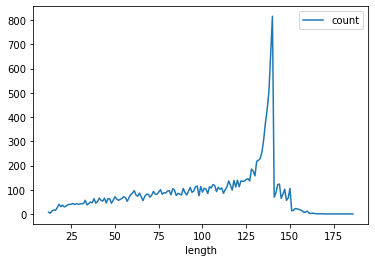

In [12]:
%matplotlib inline

from matplotlib import pyplot 


def display_length_plot(tw_df):
    """
    plot for a dataset
    """
    lengths = tw_df["text"].str.len()\
                               .reset_index(name="length")\
                               .groupby("length")\
                               .size()\
                               .reset_index(name="count")
    lengths.plot(x="length", y="count", kind="line")
    
display_length_plot(tw)

plot for each classes is analyzed

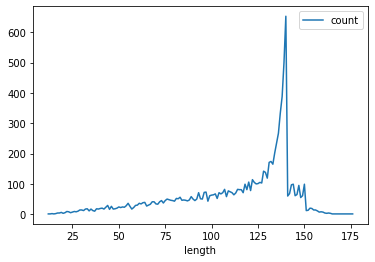

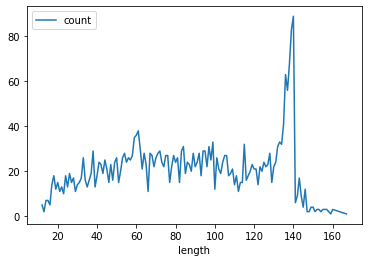

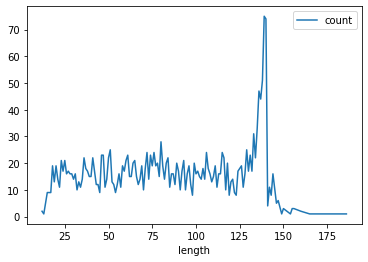

In [6]:
display_length_plot(tweets[tweets["sentiment"] == "negative"])
display_length_plot(tweets[tweets["sentiment"] == "neutral"])
display_length_plot(tweets[tweets["sentiment"] == "positive"])

Let's store the variable for futher usage with a magic function of Jupyter Notebook.

In [14]:
%store tw

Stored 'tw' (DataFrame)


In [ ]:
# Data preparation

# For the purposes of Machine Learning methods, we usually need to convert the dataset to the mathematical vector,
# where each dimension defines a different feature. In our case, we need to find a good way of encoding given tweet in 
# such form. There are several possible ways of doing that, but first of all let's dive into the dataset and see if there
# is anything we can do to improve the quality of the messages we have.

# As humans, we don't see any difference between capital and small letters, but for a computer such words
# would be seen as completely different ones. There are several other corrections we probably need to apply,
# as our datset is written by some random people, who often don't care about grammatical correctness, etc. Let's
# then analyze the dataset we have and see if we can correct some common issues.
